In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
football = pd.read_csv('dummy_data_sets/international_football_results.csv')
penguins = pd.read_csv('dummy_data_sets/penguins.csv')

In [ ]:
football.shape
football.info()
football.describe()
football.head()

In [5]:
football['year'] = pd.to_datetime(football['date']).dt.year
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


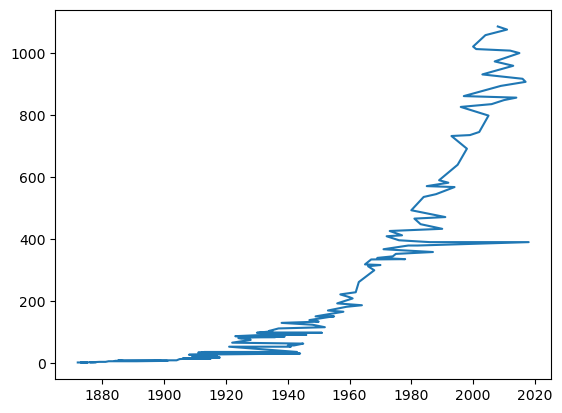

In [22]:
football['year'].value_counts().plot();

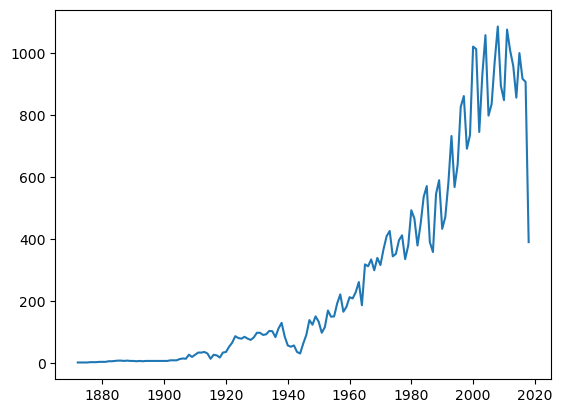

In [8]:
football['year'].value_counts().sort_index().plot();

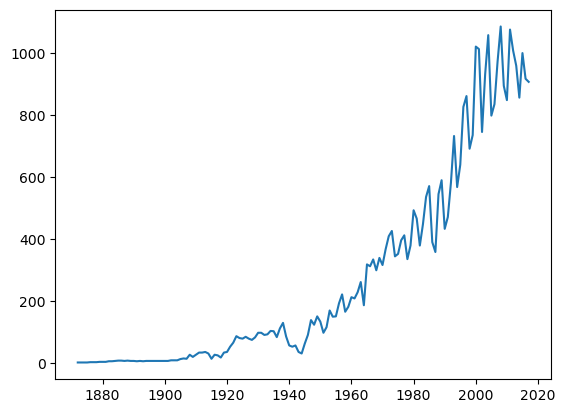

In [9]:
football['year'].value_counts().sort_index()[:-1].plot();

In [10]:
FIFA = football[football['tournament'].str.contains('FIFA')]
FIFA.head()
FIFA.value_counts()

date        home_team    away_team         home_score  away_score  tournament                    city            country      neutral  year
1930-07-13  Belgium      USA               0           3           FIFA World Cup                Montevideo      Uruguay      True     1930    1
2005-10-12  France       Cyprus            4           0           FIFA World Cup qualification  Saint-Denis     France       False    2005    1
            Portugal     Latvia            3           0           FIFA World Cup qualification  Porto           Portugal     False    2005    1
            Peru         Bolivia           4           1           FIFA World Cup qualification  Tacna           Peru         False    2005    1
            Paraguay     Colombia          0           1           FIFA World Cup qualification  Asunción        Paraguay     False    2005    1
                                                                                                                                       

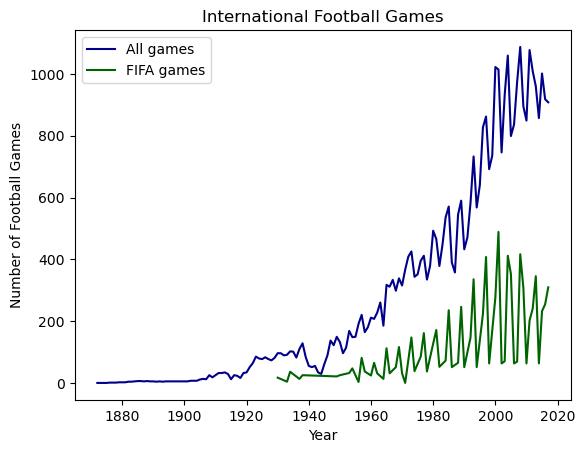

In [12]:
football['year'].value_counts().sort_index()[:-1].plot(label ='All games', c='darkblue')
FIFA['year'].value_counts().sort_index()[:-1].plot(label = 'FIFA games', c='darkgreen')
plt.xlabel('Year')
plt.ylabel('Number of Football Games')
plt.title('International Football Games')
plt.legend();

In [13]:
football['country'].value_counts()

USA                  1087
France                775
England               659
Malaysia              634
Sweden                632
                     ... 
Greenland               2
Belgian Congo           1
Portuguese Guinea       1
Mali Federation         1
Micronesia FS           1
Name: country, Length: 265, dtype: int64

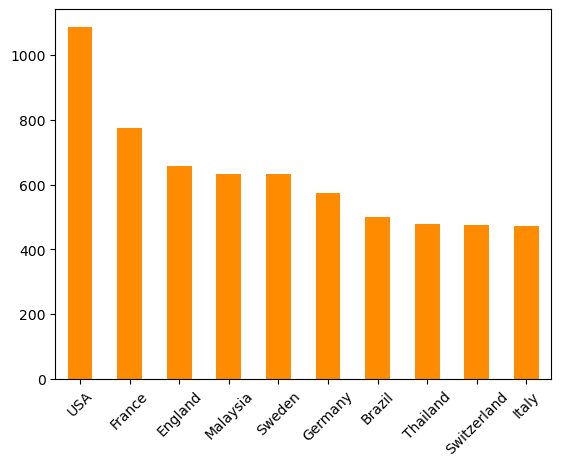

In [14]:
football['country'].value_counts().head(10).plot(kind='bar', color='darkorange')
plt.xticks(rotation=45);

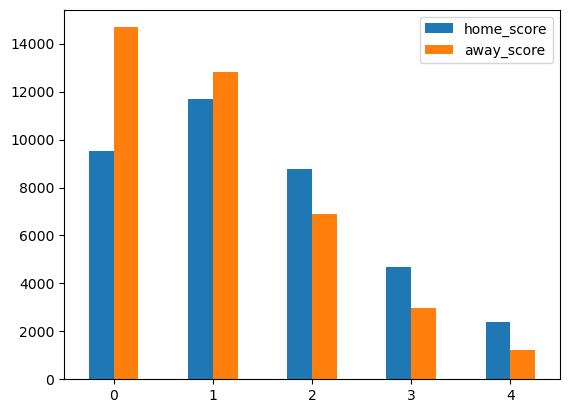

In [15]:
football[['home_score', 'away_score']].apply(pd.Series.value_counts).sort_index().head().plot(kind = 'bar')
plt.xticks(rotation=  0);

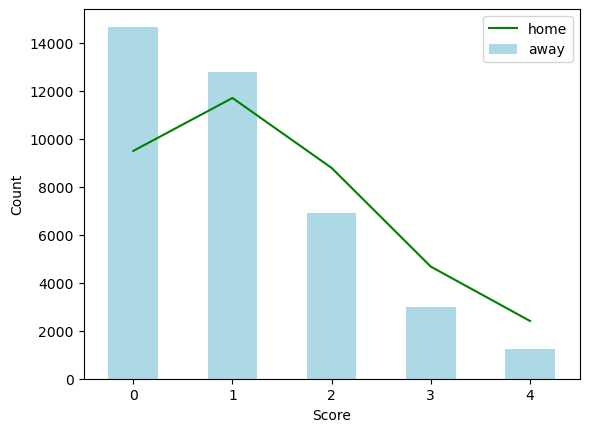

In [16]:
football['away_score'].value_counts().sort_index().head().plot(kind = 'bar', color ='lightblue', label="away")
football['home_score'].value_counts().sort_index().head().plot(c = 'green', label="home")
plt.xticks(rotation=  0)
plt.legend()
plt.xlabel('Score')
plt.ylabel('Count');

In [21]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [23]:
penguins.columns = penguins.columns.str.replace(' ', '_').str.lower()

In [24]:
adelie = penguins[penguins['species'] == 'Adelie Penguin (Pygoscelis adeliae)']
gentoo = penguins[penguins['species'] == 'Gentoo penguin (Pygoscelis papua)']
chinstrap = penguins[penguins['species'] == 'Chinstrap penguin (Pygoscelis antarctica)']

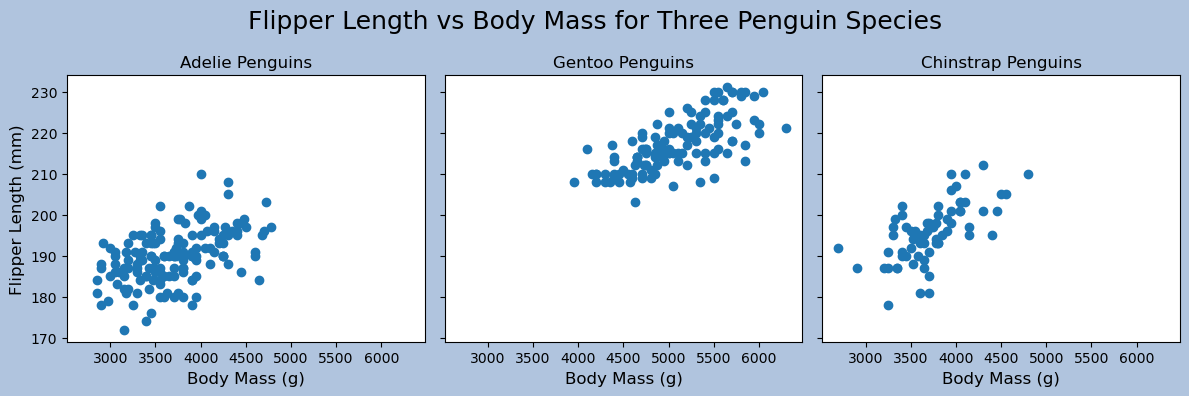

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)

ax[0].scatter(x=adelie['body_mass_(g)'], 
              y=adelie['flipper_length_(mm)'])
ax[1].scatter(x=gentoo['body_mass_(g)'], 
              y=gentoo['flipper_length_(mm)'])
ax[2].scatter(x=chinstrap['body_mass_(g)'], 
              y=chinstrap['flipper_length_(mm)'])

penguin_names = ['Adelie', 'Gentoo', 'Chinstrap']

for i in range(len(ax)):
    ax[i].set_xlabel('Body Mass (g)', fontsize=12)
    ax[i].set_title(f'{penguin_names[i]} Penguins')
    
ax[0].set_ylabel('Flipper Length (mm)', fontsize=12)

fig.suptitle('Flipper Length vs Body Mass for Three Penguin Species', fontsize=18)
fig.set_facecolor('lightsteelblue')

plt.tight_layout();

In [26]:
import seaborn as sns

In [27]:
adelie['island'].value_counts()

Dream        56
Torgersen    52
Biscoe       44
Name: island, dtype: int64

In [28]:
sns.set_theme(context = 'paper')

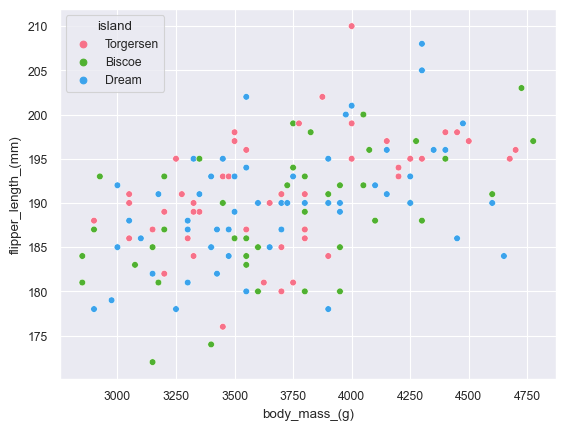

In [29]:
sns.scatterplot(x=adelie['body_mass_(g)'], y=adelie['flipper_length_(mm)'],
               hue=adelie['island'], palette='husl');

In [30]:
sns.set_theme(context = 'notebook')

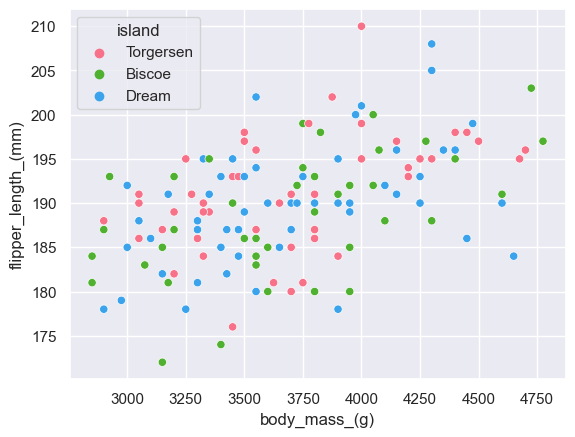

In [31]:
sns.scatterplot(x=adelie['body_mass_(g)'], y=adelie['flipper_length_(mm)'],
               hue=adelie['island'], palette='husl');